<a href="https://colab.research.google.com/github/shivankgoel/TranformersFromScratch/blob/main/1_attention_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
def display_attention_matrix(attention_scores):
  # Apply softmax to get attention weights
  attention_weights = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=1, keepdims=True)

  # Plot the heatmap
  plt.figure(figsize=(8, 6))
  plt.imshow(attention_weights, cmap='viridis', interpolation='nearest')
  plt.colorbar(label='Attention Weight')
  plt.title('Attention Heatmap')
  plt.xlabel('Key Tokens')
  plt.ylabel('Query Tokens')

  # Annotate the heatmap for clarity
  for i in range(attention_weights.shape[0]):
      for j in range(attention_weights.shape[1]):
          plt.text(j, i, f'{attention_weights[i, j]:.2f}', ha='center', va='center', color='white')

  # Display the heatmap
  plt.tight_layout()
  plt.show()

0.9990086855174316
0.9046223474799702 0.8081209018625257 0.7906616215314864 7.992069484139453 None
[[ 0.46930562  0.70846164 -0.41174282 -0.22853702]
 [-0.97453905 -1.36796782  0.29547424 -2.0969437 ]
 [-0.59699809 -0.66707333  1.37020001 -0.4697052 ]
 [-1.16255324  1.90686249 -0.92430475  0.11171225]]
[[5.0879397 ]
 [2.09858487]
 [5.62499439]
 [8.55961916]]


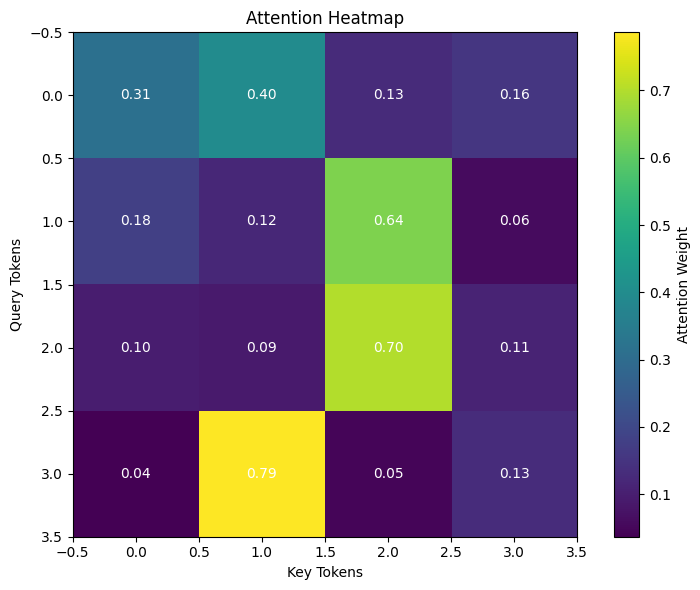

In [28]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

voc_sz, k_sz, q_sz, v_sz = 4, 8, 8 , 12
k = np.random.randn(voc_sz, k_sz)
q = np.random.randn(voc_sz, q_sz)
v = np.random.randn(voc_sz, v_sz)

attention_scores = np.matmul(q, k.T) / math.sqrt(k_sz)

print(q.var(), k.var(), v.var(), (np.matmul(q,k.T)).var(), print(attention_scores.var()))


print(attention_scores)
print(np.sum(np.exp(attention_scores), axis=1, keepdims=True))
display_attention_matrix(attention_scores)

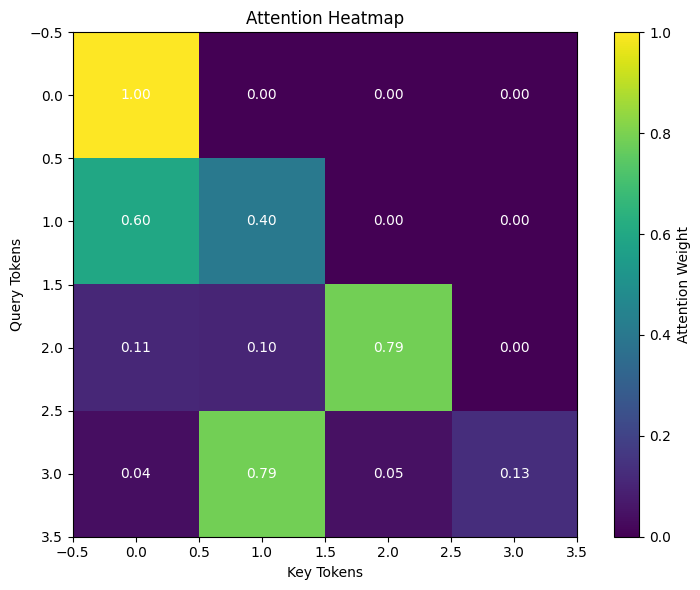

In [29]:
mask = np.tril(np.ones((voc_sz, voc_sz)))
mask[mask == 0] = -np.inf
mask[mask == 1] = 0
attention_scores = attention_scores +  mask
display_attention_matrix(attention_scores)